## Assignment 2 - Machine Learning CITS5508
### Completed by Ammad Ur Rahman (23853569)

### Tasks

First load datasets and import relevant libraries.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score


In [4]:
# Load the dataset
data = load_breast_cancer()

# Convert to a DataFrame for sorting
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

#### D1

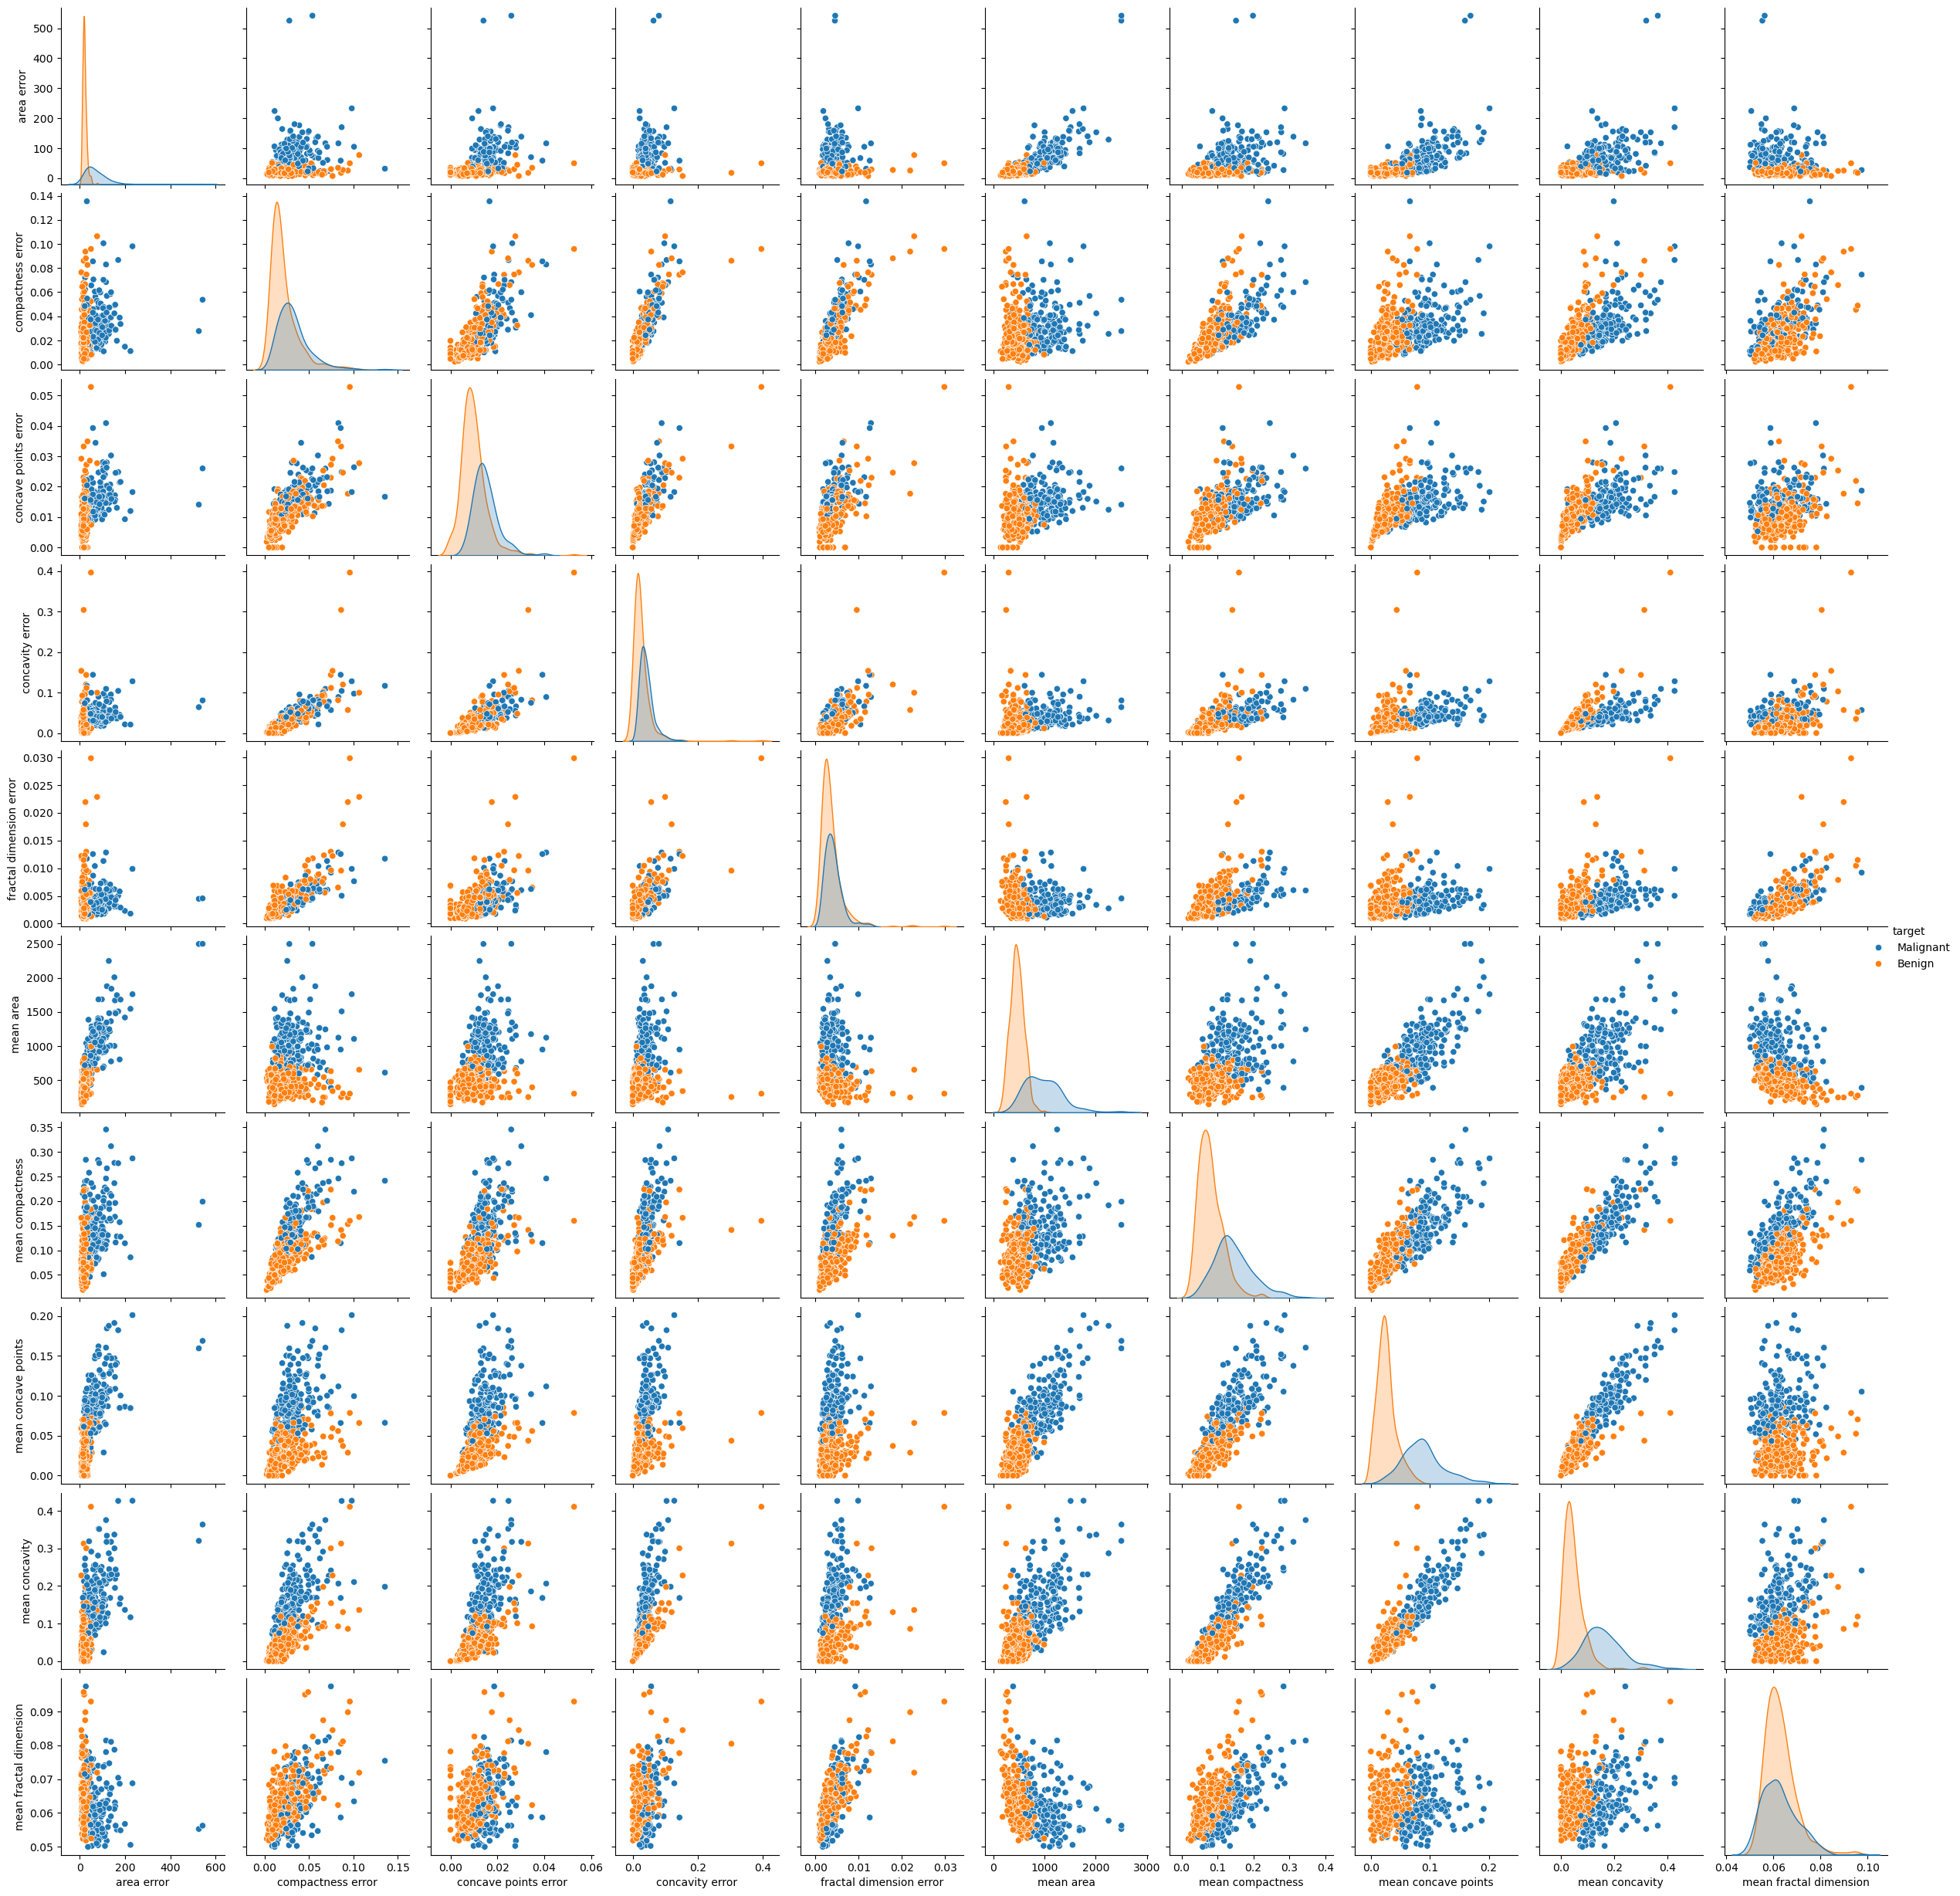

In [16]:
# Sort the DataFrame by column names
sorted_col = sorted(df.columns)  # This sorts all columns including 'target'
df_sorted = df[sorted_col]

# Select the first 10 sorted feature columns
first_10_features = sorted_col[:10]

# Create a pairplot of the first 10 sorted features, coloring by 'target'
g = sb.pairplot(df_sorted[first_10_features + ['target']], hue="target")

# Enhance legend with class labels
target_labels = ["Malignant", "Benign"]
for t, l in zip(g._legend.texts, target_labels):
    t.set_text(l)



### D3

Text(0.5, 1.0, 'Correlation Matrix of First 10 Breast Cancer Features')

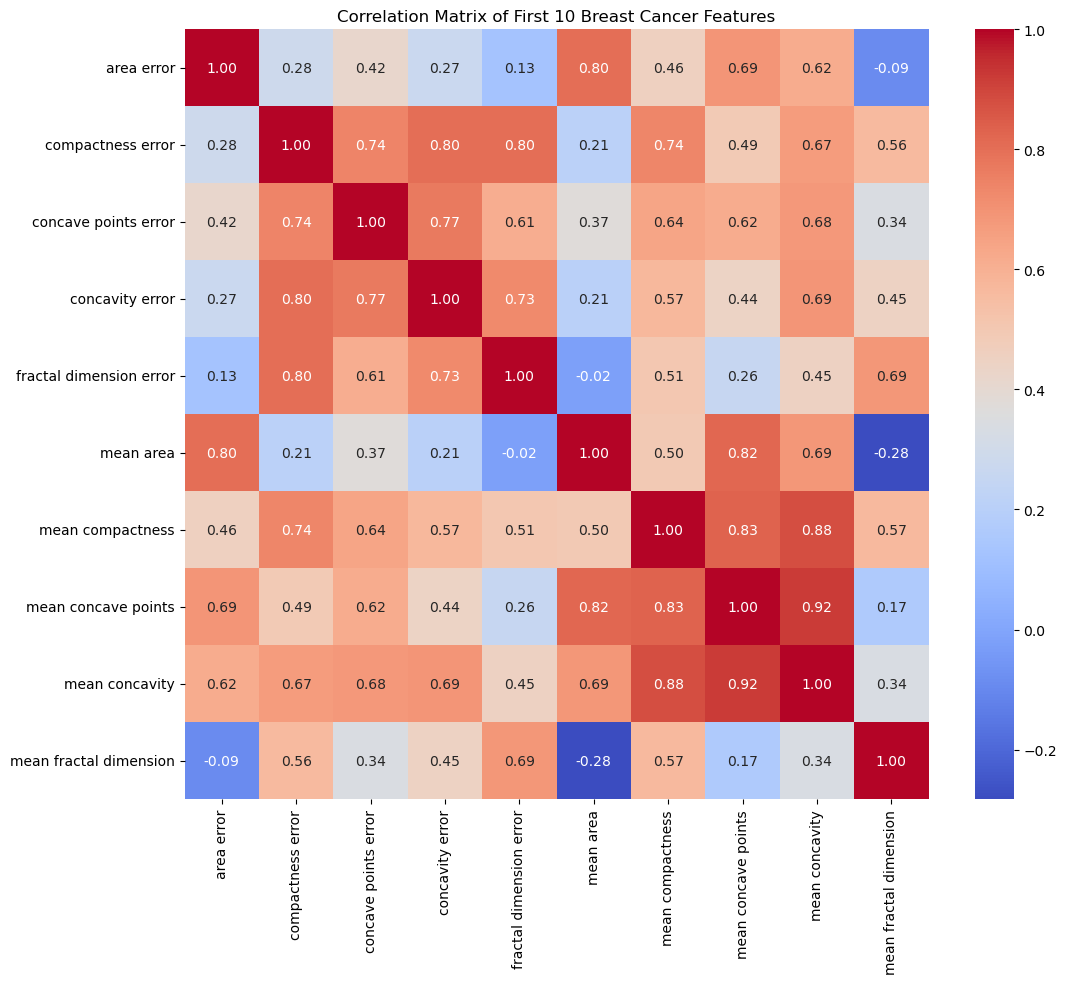

In [6]:
# Set up df with first 10 features for correlation matrix
df_10_features = df_sorted[first_10_features]
corr_matrix = df_10_features.corr()

# Configure size for plot
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add title
plt.title('Correlation Matrix of First 10 Breast Cancer Features')



### D5

In [7]:
# Drop high linearly correlated features
df_sorted = df_sorted.drop(["mean perimeter", "mean radius", "worst radius", "worst perimeter", "radius error"], axis=1)

# Check if have 25 features plus target column
print(df_sorted.shape)

(569, 26)


### D6

In [8]:
# Split df into train and test sets
train_set, test_set = train_test_split(df_sorted, test_size=0.2, random_state=5508)

In [9]:
# Set up X and y for model training
X_train = train_set.drop("target", axis = 1)
y_train = train_set["target"]

X_test = test_set.drop("target", axis=1)
y_test = test_set["target"]

In [23]:
# Fit the decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

# Make predictions on training and test set
y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

# Build performance function of precision, accuracy, recall with confusion matrix for reuse later
def performance(y_set, y_pred_set):
    precision = precision_score(y_set, y_pred_set)
    accuracy = accuracy_score(y_set, y_pred_set)
    recall = recall_score(y_set, y_pred_set)

    return precision, accuracy, recall

# Build function to print out performance results for ease of use
def print_perf(title, precision, accuracy, recall):
    output = f"""
    \033[1m{title}\033[0m
    Precision score is:
    {precision:.2f}
    Accuracy score is:
    {accuracy:.2f}
    Recall score is:
    {recall:.2f}
    """
    print(output)

# Calculate performance measures for train set
dt_precision_train, dt_accuracy_train, dt_recall_train = performance(y_train, y_pred_train)
print_perf("Train", dt_precision_train, dt_accuracy_train, dt_recall_train)

# Calculate performance measures for test set
dt_precision_test, dt_accuracy_test, dt_recall_test = performance(y_test, y_pred_test)
print_perf("Test", dt_precision_test, dt_accuracy_test, dt_recall_test)

# Calculate and print confusion matrix for only test set
dt_conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for Test Set:")
print(pd.DataFrame(dt_conf_matrix_test, index=target_labels, columns=target_labels))




    Train
    Precision score is:
    1.0.2f
    Accuracy score is:
    1.0.2f
    Recall score is:
    1.0.2f
    

    Test
    Precision score is:
    0.9722222222222222.2f
    Accuracy score is:
    0.956140350877193.2f
    Recall score is:
    0.958904109589041.2f
    
Confusion Matrix for Test Set:
           Malignant  Benign
Malignant         39       2
Benign             3      70
